In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
df = pd.read_csv('sephora_website_dataset.csv')
df.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


In [4]:
df.columns

Index(['id', 'brand', 'category', 'name', 'size', 'rating',
       'number_of_reviews', 'love', 'price', 'value_price', 'URL',
       'MarketingFlags', 'MarketingFlags_content', 'options', 'details',
       'how_to_use', 'ingredients', 'online_only', 'exclusive',
       'limited_edition', 'limited_time_offer'],
      dtype='object')

### Business questions to answer:

* What categories of products do they sell? Which category has the most products?
* Which brand do customers love the most?
* Does the 'most loved' brand sell products in the category in which Sephora has most products?
* What factors impact customers loving a product?

<AxesSubplot:>

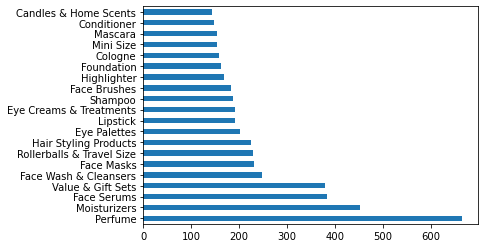

In [5]:
df['category'].value_counts()[:20].plot(kind = 'barh')

* They have 143 categories and 'Perfume' category has the most products.
* This is interesting to me because I always associated Sephora with skincare and makeup. Yet the biggest category of products they sell is perfume.

In [6]:
# Get the number of products in each brand
brand_products = df['brand'].value_counts().reset_index(name='num_products')
brand_products.rename(columns={'index':'brand'},inplace=True)
brand_products.head()

,brand,num_products
0,SEPHORA COLLECTION,496
1,CLINIQUE,234
2,tarte,170
3,TOM FORD,161
4,Dior,145


In [7]:
# Get the total 'love' votes received by each brand
total_love = df.groupby('brand').sum()['love'].reset_index(name='total_love_votes')
total_love.head()

,brand,total_love_votes
0,8Greens,5688
1,AERIN,75666
2,ALTERNA Haircare,249460
3,AMOREPACIFIC,247937
4,Acqua Di Parma,38380


In [8]:
brand_love=brand_products.merge(total_love, on='brand')
brand_love['love_rating']=brand_love['total_love_votes']/brand_love['num_products']
top_5=brand_love.sort_values(by='love_rating', ascending=False)[:5]
top_5

,brand,num_products,total_love_votes,love_rating
246,stila,7,986600,140942.857143
258,Buxom,6,741700,123616.666667
27,Anastasia Beverly Hills,70,5990600,85580.000000
43,NARS,57,4794700,84117.543860
242,Olaplex,7,515900,73700.000000


In [9]:
top_5_category=top_5.merge(df, on='brand')[['brand','love_rating','category']]
top_5_category

,brand,love_rating,category
0,stila,140942.857143,Eyeliner
1,stila,140942.857143,Eyeliner
2,stila,140942.857143,Eyeshadow
3,stila,140942.857143,Eyeshadow
4,stila,140942.857143,Eyeliner
...,...,...,...
142,Olaplex,73700.000000,Shampoo
143,Olaplex,73700.000000,Scalp & Hair Treatments
144,Olaplex,73700.000000,Hair Oil
145,Olaplex,73700.000000,Conditioner


In [10]:
# We have multiple here because the same brand could be selling products in multiple categories
top_5_category['category'].value_counts()

Eyebrow                     14
Eye Palettes                12
Highlighter                 12
Lipstick                     9
Lip Gloss                    8
Eyeliner                     7
Eye Brushes                  7
Eyeshadow                    7
Blush                        6
Foundation                   6
Bronzer                      6
Mascara                      5
Cheek Palettes               4
Face Brushes                 4
Makeup                       4
Setting Spray & Powder       4
Lip Balm & Treatment         4
Scalp & Hair Treatments      2
Conditioner                  2
Shampoo                      2
Mini Size                    2
Mirrors & Sharpeners         2
Concealer                    2
Eye Primer                   2
Contour                      2
Body Lotions & Body Oils     1
Sponges & Applicators        1
Face Oils                    1
Tinted Moisturizer           1
Eye Sets                     1
Lip Liner                    1
Face Primer                  1
Makeup R

In [11]:
# Even though Sephora offers most products in 'Perfume' category, customers mostly love their skin care, makeup and hair products
# I guess now it makes sense why I associate them with these products more than perfumes :D 

In [12]:
df.describe()

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
count,9.168000e+03,9168.000000,9168.000000,9.168000e+03,9168.000000,9168.00000,9168.000000,9168.000000,9168.000000,9168.000000
mean,1.962952e+06,3.990020,282.139180,1.627859e+04,50.063237,51.82359,0.234839,0.264725,0.091841,0.000327
std,3.859714e+05,1.007707,890.642028,4.260651e+04,47.164989,49.45902,0.423921,0.441211,0.288817,0.018087
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000
25%,1.819453e+06,4.000000,10.000000,1.600000e+03,24.000000,25.00000,0.000000,0.000000,0.000000,0.000000
50%,2.072354e+06,4.000000,46.000000,4.800000e+03,35.000000,35.00000,0.000000,0.000000,0.000000,0.000000
75%,2.230591e+06,4.500000,210.000000,1.380000e+04,59.000000,60.00000,0.000000,1.000000,0.000000,0.000000
max,2.359685e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.00000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

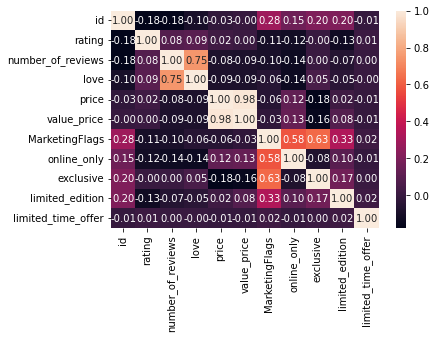

In [13]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

# It is interesting that rating and love do not have a strong correlation
# But number of reviews and love have a strong correlation

In [14]:
df.columns
# We can ignore ID, name, size, price (as we will take value price. value price is the actual price at which
# they are sold), URL, MarketingFlags, MarketingFlags_content (as their categorical columns are already in data),
# details, , ingredients


# We will convert options to yes or no
# Convert how to use to instructions given or no instructions
# ingredients to known or unknown

Index(['id', 'brand', 'category', 'name', 'size', 'rating',
       'number_of_reviews', 'love', 'price', 'value_price', 'URL',
       'MarketingFlags', 'MarketingFlags_content', 'options', 'details',
       'how_to_use', 'ingredients', 'online_only', 'exclusive',
       'limited_edition', 'limited_time_offer'],
      dtype='object')

In [15]:
df.info()
# No nulls 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [36]:
df_sub=df.loc[:,~df.columns.isin(['id','name','size','price','URL','MarketingFlags','MarketingFlags_content','details',\
                          'ingredients','brand','category'])]

In [37]:
df_sub['options_available'] = np.where(df_sub['options']=='no options',0,1) 
df_sub['instructions_available'] = np.where(df_sub['how_to_use']=='no instructions',0,1) 

/var/folders/71/ymgjllnd4ps_ns5gg6w_0jnm0000gn/T/ipykernel_3141/4193706931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['options_available'] = np.where(df_sub['options']=='no options',0,1)
/var/folders/71/ymgjllnd4ps_ns5gg6w_0jnm0000gn/T/ipykernel_3141/4193706931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['instructions_available'] = np.where(df_sub['how_to_use']=='no instructions',0,1)


In [38]:
df_sub.drop(['options','how_to_use'], axis=1, inplace=True)

/Users/asthapuri/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
df_sub.head()

,rating,number_of_reviews,love,value_price,online_only,exclusive,limited_edition,limited_time_offer,options_available,instructions_available
0,4.0,4,3002,75.0,1,0,0,0,0,1
1,4.5,76,2700,66.0,1,0,0,0,1,0
2,4.5,26,2600,180.0,1,0,0,0,1,0
3,4.5,23,2900,120.0,1,0,0,0,1,0
4,3.5,2,943,80.0,1,0,0,0,0,1


In [40]:
# Check how many categorical columns we have
cat_df_sub = df_sub.select_dtypes(include=['object'])# Subset to a dataframe only holding the categorical columns
cat_df_sub.shape[1]

0

In [41]:
# When we encode categorical variables, nan would get encoded as 0 
# unless we specify an argument for nan to have its own column

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in cat_cols:
        try:
            df=pd.concat([df.drop(col,axis=1),\
            pd.get_dummies(df[col], dummy_na=dummy_na, drop_first=True, prefix=col, prefix_sep='_')],\
                     axis=1)
        except:
            continue
    
    return df

In [42]:
#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df_sub.columns

df_new = create_dummy_df(df_sub, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show shape to assure it has a shape of (5009, 11938)
print(df_new.shape)

(9168, 10)


In [43]:
df_new.head()

,rating,number_of_reviews,love,value_price,online_only,exclusive,limited_edition,limited_time_offer,options_available,instructions_available
0,4.0,4,3002,75.0,1,0,0,0,0,1
1,4.5,76,2700,66.0,1,0,0,0,1,0
2,4.5,26,2600,180.0,1,0,0,0,1,0
3,4.5,23,2900,120.0,1,0,0,0,1,0
4,3.5,2,943,80.0,1,0,0,0,0,1


In [44]:
#Split into explanatory and response variables
X = df_new.loc[:,~df_new.columns.isin(['love'])]
y = df_new['love']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=22) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model

y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds) #r2_score
length_y_test = len(y_test) #num in y_test

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.5092168661630061 on 2751 values.'

In [45]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
6,limited_time_offer,-11155.505377,11155.505377
4,exclusive,3764.862370,3764.862370
7,options_available,-3572.547328,3572.547328
3,online_only,-2843.015654,2843.015654
8,instructions_available,2500.934427,2500.934427
0,rating,1468.886586,1468.886586
5,limited_edition,828.714756,828.714756
1,number_of_reviews,36.916119,36.916119
2,value_price,-3.871008,3.871008
